# Comparison with EventDisplay

**Purpose of this notebook:**

Compare IRF and Sensitivity as computed by pyirf and EventDisplay on the same DL2 results

**Notes:**

The following results correspond to:

- Paranal site
- Zd 20 deg, Az 180 deg
- 50 h observation time

**Resources:**

_EventDisplay_ DL2 data, https://forge.in2p3.fr/projects/cta_analysis-and-simulations/wiki/Eventdisplay_Prod3b_DL2_Lists


Download and unpack the data using 

```bash
$ curl -fL -o data.zip https://nextcloud.e5.physik.tu-dortmund.de/index.php/s/Cstsf8MWZjnz92L/download
$ unzip data.zip
$ mv eventdisplay_dl2 data
```

## Table of contents

* [Optimized cuts](#Optimized-cuts)
    - [Direction cut](#Direction-cut)
* [Differential sensitivity from cuts optimization](#Differential-sensitivity-from-cuts-optimization)
* [IRFs](#IRFs)
    - [Effective area](#Effective-area)
    - [Point Spread Function](#Point-Spread-Function)
        + [Angular resolution](#Angular-resolution)
    - [Energy dispersion](#Energy-dispersion)
        + [Energy resolution](#Energy-resolution)
    - [Background rate](#Background-rate)

## Imports

In [11]:
import os

import numpy as np
import uproot
from astropy.io import fits
import astropy.units as u
import matplotlib.pyplot as plt
from astropy.table import QTable
from matplotlib.ticker import ScalarFormatter

from pyirf.binning import bin_center

%matplotlib inline

In [12]:
plt.rcParams['figure.figsize'] = (9, 6)

## Input data

### _EventDisplay_

The input data provided by _EventDisplay_ is stored in _ROOT_ format, so _uproot_ is used to transform it into _numpy_ objects. 

In [13]:
# Path of EventDisplay IRF data in the user's local setup
# Please, empty the indir_EventDisplay variable before pushing to the repo
indir = "../../data/"
irf_file_event_display = "DESY.d20180113.V3.ID0NIM2LST4MST4SST4SCMST4.prod3b-paranal20degs05b-NN.S.3HB9-FD.180000s.root"

irf_eventdisplay = uproot.open(os.path.join(indir, irf_file_event_display))

In [14]:
irf_eventdisplay.keys()

[b'IntSens;1',
 b'IntSensCU;1',
 b'DiffSens;1',
 b'DiffSensCU;1',
 b'BGRate;1',
 b'ProtRate;1',
 b'ElecRate;1',
 b'BGRatePerSqDeg;1',
 b'ProtRateSqDeg;1',
 b'ElecRateSqDeg;1',
 b'EffectiveArea;1',
 b'EffectiveAreaEtrue;1',
 b'EffectiveAreaEtrueNoTheta2cut;1',
 b'EffectiveAreaNoTheta2cut;1',
 b'EffectiveArea80;1',
 b'AngRes;1',
 b'AngRes80;1',
 b'AngRes95;1',
 b'AngResEtrue;1',
 b'AngResEtrue80;1',
 b'AngResEtrue95;1',
 b'ERes;1',
 b'Ebias;1',
 b'Theta2Cut;1',
 b'ThetaCut;1',
 b'MigMatrix;1',
 b'MigMatrixNoTheta2cut;1',
 b'EestOverEtrue;1',
 b'EestOverEtrueNoTheta2cut;1',
 b'AngularPSF2D;1',
 b'AngularPSF2DEtrue;1',
 b'IntSens_offaxis;1',
 b'IntSensCU_offaxis;1',
 b'DiffSens_offaxis;1',
 b'DiffSensCU_offaxis;1',
 b'BGRate_offaxis;1',
 b'ProtRate_offaxis;1',
 b'ElecRate_offaxis;1',
 b'BGRatePerSqDeg_offaxis;1',
 b'ProtRateSqDeg_offaxis;1',
 b'ElecRateSqDeg_offaxis;1',
 b'EffectiveArea_offaxis;1',
 b'EffectiveAreaEtrue_offaxis;1',
 b'EffectiveAreaEtrueNoTheta2cut_offaxis;1',
 b'EffectiveA

In [15]:
sensitivity_ed = QTable({
    'reco_energy_low': 10**irf_eventdisplay['ElecRate;1'].edges[:-1],
    'reco_energy_high': 10**irf_eventdisplay['ElecRate;1'].edges[1:],
    'reco_energy_center': bin_center(10**irf_eventdisplay['ElecRate;1'].edges),
    'n_electron_weighted': irf_eventdisplay['ElecRate;1'].values * 3600 * 50,
    'n_proton_weighted': irf_eventdisplay['ProtRate;1'].values * 3600 * 50,
    'n_background_weighted': irf_eventdisplay['BGRate;1'].values * 3600 * 50,
    'relative_sensitivity': irf_eventdisplay['DiffSensCU;1'].values,
    'flux_sensitivity': irf_eventdisplay['DiffSens;1'].values * u.Unit('erg cm-2 s-1'),
})

# make it print nice
sensitivity_ed['reco_energy_low'].info.format = '.3g'
sensitivity_ed['reco_energy_high'].info.format = '.3g'
sensitivity_ed['reco_energy_center'].info.format = '.3g'
sensitivity_ed['relative_sensitivity'].info.format = '.2g'
sensitivity_ed['flux_sensitivity'].info.format = '.3g'

for k in filter(lambda k: k.startswith('n_'), sensitivity_ed.colnames):
    sensitivity_ed[k].info.format = '.1f'

sensitivity_ed

reco_energy_low,reco_energy_high,reco_energy_center,n_electron_weighted,n_proton_weighted,n_background_weighted,relative_sensitivity,flux_sensitivity
,,,,,,,erg / (cm2 s)
float64,float64,float64,float32,float32,float32,float32,float32
0.0126,0.02,0.0163,1344.9,11477.6,12822.5,0.085,4.89e-11
0.02,0.0316,0.0258,19263.4,77542.4,96805.8,0.057,2.45e-11
0.0316,0.0501,0.0409,11820.2,34612.5,46432.7,0.023,7.54e-12
0.0501,0.0794,0.0648,3707.1,8053.7,11760.8,0.0073,1.81e-12
0.0794,0.126,0.103,2493.2,3391.1,5884.3,0.0043,7.9e-13
0.126,0.2,0.163,915.2,847.7,1762.8,0.0034,4.67e-13
0.2,0.316,0.258,351.6,197.0,548.6,0.0028,2.89e-13
0.316,0.501,0.409,133.5,59.5,193.1,0.0025,1.98e-13


In [16]:
pyirf_file = '../../pyirf_eventdisplay_cuts2.fits.gz'

## PyIRF
[back to top](#Table-of-contents)

In [17]:
# [1:-1] removes under/overflow bins
sensitivity = QTable.read(pyirf_file, hdu='SENSITIVITY')[1:-1]
sensitivity.remove_columns(['n_signal', 'n_background', 'n_electron', 'n_proton'])

# scale by E² and convert to same unit as ED
sensitivity['flux_sensitivity'] = (sensitivity['reco_energy_center']**2 * sensitivity['flux_sensitivity']).to(u.Unit('erg cm-2 s-1'))

# make it print nice
sensitivity['reco_energy_low'].info.format = '.3g'
sensitivity['reco_energy_high'].info.format = '.3g'
sensitivity['reco_energy_center'].info.format = '.3g'
sensitivity['relative_sensitivity'].info.format = '.2g'
sensitivity['flux_sensitivity'].info.format = '.3g'

for k in filter(lambda k: k.startswith('n_'), sensitivity.colnames):
    sensitivity[k].info.format = '.1f'

    
sensitivity['n_over_b'].info.format = '.3f'
sensitivity

reco_energy_low,reco_energy_high,reco_energy_center,n_signal_weighted,n_background_weighted,significance,n_electron_weighted,n_proton_weighted,relative_sensitivity,flux_sensitivity,n_over_b
TeV,TeV,TeV,,,,,,,erg / (cm2 s),
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.0126,0.02,0.0163,430.5,30053.1,5.0,1106.0,28947.1,0.08,4.65e-11,0.072
0.02,0.0316,0.0258,3663.6,366361.9,12.2,30569.8,335792.1,0.05,2.18e-11,0.050
0.0316,0.0501,0.0409,2262.8,226277.7,9.6,30385.6,195892.1,0.025,8.11e-12,0.050
0.0501,0.0794,0.0648,584.2,55743.2,5.0,11836.1,43907.1,0.0079,1.97e-12,0.052
0.0794,0.126,0.103,450.0,32883.1,5.0,9826.3,23056.8,0.0048,8.91e-13,0.068
0.126,0.2,0.163,238.1,8992.4,5.0,3974.5,5017.9,0.0036,5e-13,0.132
0.2,0.316,0.258,131.5,2634.3,5.0,1519.1,1115.2,0.0029,3e-13,0.250
0.316,0.501,0.409,79.6,908.6,5.0,563.9,344.7,0.0026,2.06e-13,0.438


In [24]:
merged = QTable()

for col in ['n_background_weighted', 'n_proton_weighted', 'relative_sensitivity']:
    merged[col + '_ed'] = sensitivity_ed[col]
    merged[col + '_pyirf'] = sensitivity[col]
    # merged[col + '_ratio'] = sensitivity[col] / sensitivity_ed[col]
    #merged[col + '_ratio'].info.format = '.4f'

merged

n_background_weighted_ed,n_background_weighted_pyirf,n_proton_weighted_ed,n_proton_weighted_pyirf,relative_sensitivity_ed,relative_sensitivity_pyirf
float32,float64,float32,float64,float32,float64
12822.5,30053.1,11477.6,28947.1,0.085,0.08
96805.8,366361.9,77542.4,335792.1,0.057,0.05
46432.7,226277.7,34612.5,195892.1,0.023,0.025
11760.8,55743.2,8053.7,43907.1,0.0073,0.0079
5884.3,32883.1,3391.1,23056.8,0.0043,0.0048
1762.8,8992.4,847.7,5017.9,0.0034,0.0036
548.6,2634.3,197.0,1115.2,0.0028,0.0029
193.1,908.6,59.5,344.7,0.0025,0.0026
71.6,328.5,21.2,117.1,0.0024,0.0024


### Event Counts

<Figure size 864x576 with 0 Axes>

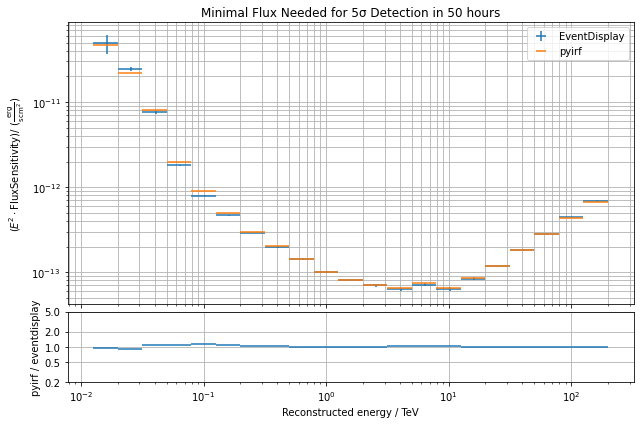

In [19]:
plt.figure(figsize=(12,8))

# Get data from event display file
h = irf_eventdisplay["DiffSens"]
bins = 10**h.edges
x = 0.5 * (bins[:-1] + bins[1:])
width = np.diff(bins)
y = h.values
yerr = np.sqrt(h.variances)

fig, (ax_sens, ax_ratio) = plt.subplots(
    2, 1,
    gridspec_kw={'height_ratios': [4, 1]},
    sharex=True,
)

ax_sens.errorbar(
    x,
    y, 
    xerr=width/2,
    yerr=yerr,
    label="EventDisplay",
    ls=''
)

unit = u.Unit('erg cm-2 s-1')


e = sensitivity['reco_energy_center']
w = (sensitivity['reco_energy_high'] - sensitivity['reco_energy_low'])
s = sensitivity['flux_sensitivity']


ax_sens.errorbar(
    e.to_value(u.TeV),
    s.to_value(unit),
    xerr=w.to_value(u.TeV) / 2,
    ls='',
    label='pyirf'
)

ax_ratio.errorbar(
    e.to_value(u.TeV), s.to_value(unit) / y,
    xerr=w.to_value(u.TeV)/2,
    ls=''
)
ax_ratio.set_yscale('log')
ax_ratio.set_xlabel("Reconstructed energy / TeV")
ax_ratio.set_ylabel('pyirf / eventdisplay')
ax_ratio.grid()
ax_ratio.yaxis.set_major_formatter(ScalarFormatter())

ax_ratio.set_ylim(0.2, 5.0)
ax_ratio.set_yticks([0.2, 0.5, 1, 2, 5])
ax_ratio.set_yticks([], minor=True)

# Style settings
ax_sens.set_title('Minimal Flux Needed for 5σ Detection in 50 hours')
ax_sens.set_xscale("log")
ax_sens.set_yscale("log")
ax_sens.set_ylabel(rf"$(E^2 \cdot \mathrm{{Flux Sensitivity}}) /$ ({unit.to_string('latex')})")

ax_sens.grid(which="both")
ax_sens.legend()
fig.tight_layout(h_pad=0)

None # to remove clutter by mpl objects